In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!cp /content/gdrive/My\ Drive/data/*.zip .
!unzip /content/sudoku.zip
!mkdir /content/test
!unzip /content/sudoku_test.zip -d /content/test
!mv /content/test/sudoku.csv /content/sudoku_test.csv

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Archive:  /content/sudoku.zip
  inflating: sudoku.csv              
Archive:  /content/sudoku_test.zip
  inflating: /content/test/sudoku.csv  


In [2]:
!rm -rf drl-sudoku
!git clone https://github.com/cloughurd/drl-sudoku.git
!mv drl-sudoku/rl/* .

Cloning into 'drl-sudoku'...
remote: Enumerating objects: 295, done.
remote: Counting objects: 100% (295/295), done.
remote: Compressing objects: 100% (233/233), done.
remote: Total 295 (delta 184), reused 118 (delta 54), pack-reused 0
Receiving objects: 100% (295/295), 711.09 KiB | 2.15 MiB/s, done.
Resolving deltas: 100% (184/184), done.


In [0]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import json

assert torch.cuda.is_available()
from IPython.core.ultratb import AutoFormattedTB
__ITB__ = AutoFormattedTB(mode = 'Verbose',color_scheme='LightBg', tb_offset = 1)

from env.SisypheanGrid import SisypheanGrid
from helpers import prepare_batch, learn_dqn, get_action_dqn
from qnetwork import QNetwork

Loading grid.
Loaded grid.


Episodes: 0 Reward: -12 Epsilon: 0.9994 Positive Reward Count: 0:   0%|          | 1/50000 [00:00<23:09, 35.98it/s]


Epoch 0


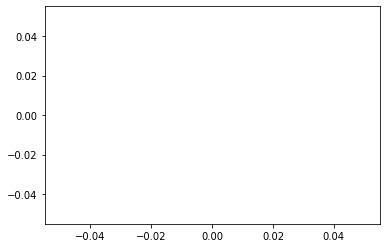

Episodes: 1000 Reward: -12 Epsilon: 0.5084 Positive Reward Count: 2:   2%|▏         | 1001/50000 [11:19<11:35:54,  1.17it/s]


Epoch 1000


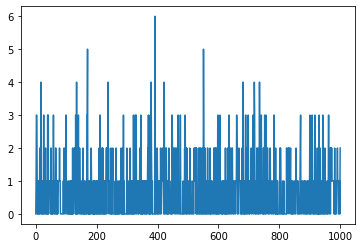

Episodes: 2000 Reward: -12 Epsilon: 0.2613 Positive Reward Count: 0:   4%|▍         | 2001/50000 [25:54<12:23:10,  1.08it/s]


Epoch 2000


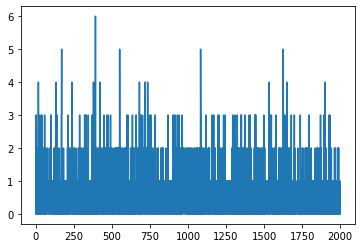

Episodes: 3000 Reward: -12 Epsilon: 0.1354 Positive Reward Count: 1:   6%|▌         | 3001/50000 [41:42<13:02:09,  1.00it/s]


Epoch 3000


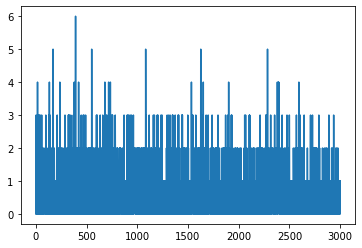

Episodes: 4000 Reward: -12 Epsilon: 0.0704 Positive Reward Count: 0:   8%|▊         | 4001/50000 [58:08<13:08:18,  1.03s/it]


Epoch 4000


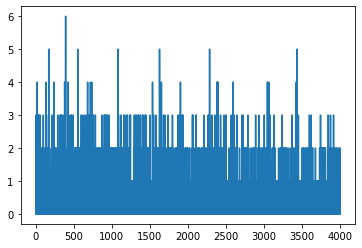

Episodes: 5000 Reward: -12 Epsilon: 0.0368 Positive Reward Count: 0:  10%|█         | 5001/50000 [1:14:30<11:32:02,  1.08it/s]


Epoch 5000


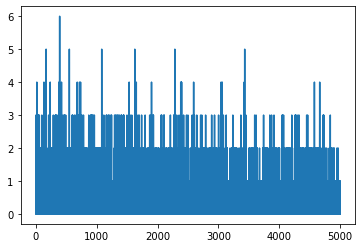

Episodes: 6000 Reward: -12 Epsilon: 0.0192 Positive Reward Count: 0:  12%|█▏        | 6001/50000 [1:31:18<12:22:58,  1.01s/it]


Epoch 6000


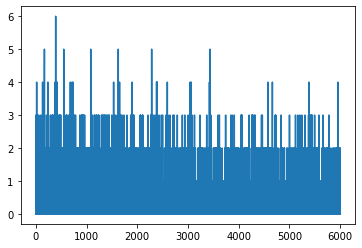

Episodes: 7000 Reward: -12 Epsilon: 0.0100 Positive Reward Count: 0:  14%|█▍        | 7001/50000 [1:48:18<11:31:20,  1.04it/s]


Epoch 7000


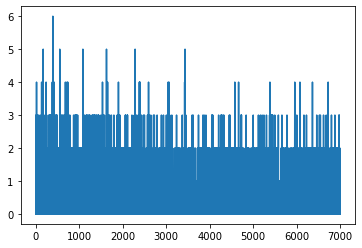

Episodes: 8000 Reward: -12 Epsilon: 0.0052 Positive Reward Count: 0:  16%|█▌        | 8001/50000 [2:06:03<11:58:34,  1.03s/it]


Epoch 8000


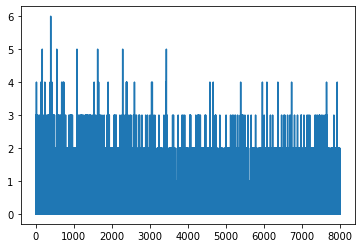

Episodes: 9000 Reward: -12 Epsilon: 0.0027 Positive Reward Count: 3:  18%|█▊        | 9001/50000 [2:24:20<15:45:55,  1.38s/it]


Epoch 9000


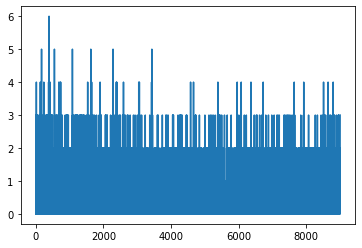

Episodes: 10000 Reward: -12 Epsilon: 0.0014 Positive Reward Count: 0:  20%|██        | 10001/50000 [2:42:16<10:44:38,  1.03it/s]


Epoch 10000


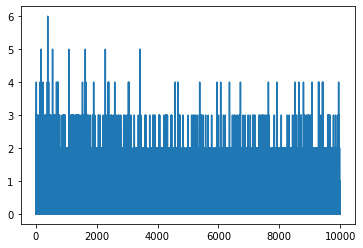

Episodes: 11000 Reward: -12 Epsilon: 0.0007 Positive Reward Count: 1:  22%|██▏       | 11001/50000 [2:59:29<10:44:55,  1.01it/s]


Epoch 11000


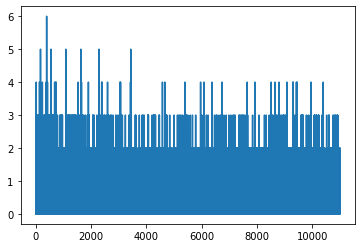

Episodes: 12000 Reward: -12 Epsilon: 0.0004 Positive Reward Count: 0:  24%|██▍       | 12001/50000 [3:16:34<10:02:30,  1.05it/s]


Epoch 12000


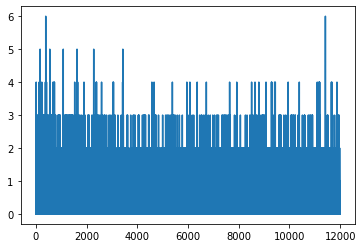

Episodes: 13000 Reward: -12 Epsilon: 0.0002 Positive Reward Count: 0:  26%|██▌       | 13001/50000 [3:33:42<10:08:29,  1.01it/s]


Epoch 13000


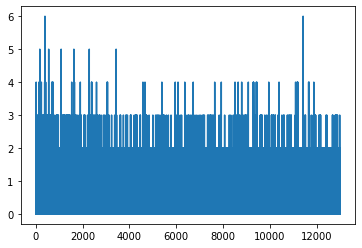

Episodes: 14000 Reward: -12 Epsilon: 0.0001 Positive Reward Count: 0:  28%|██▊       | 14001/50000 [3:50:59<10:21:09,  1.04s/it]


Epoch 14000


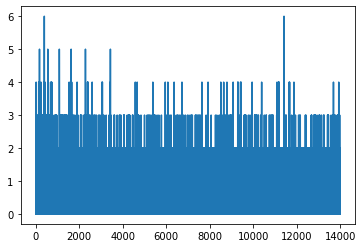

Episodes: 15000 Reward: -12 Epsilon: 0.0001 Positive Reward Count: 0:  30%|███       | 15001/50000 [4:08:17<9:53:23,  1.02s/it]


Epoch 15000


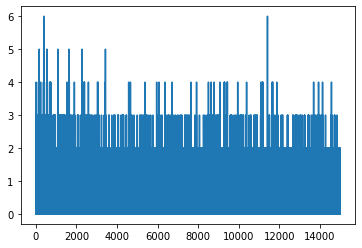

Episodes: 16000 Reward: -12 Epsilon: 0.0000 Positive Reward Count: 1:  32%|███▏      | 16001/50000 [4:25:30<9:55:56,  1.05s/it]


Epoch 16000


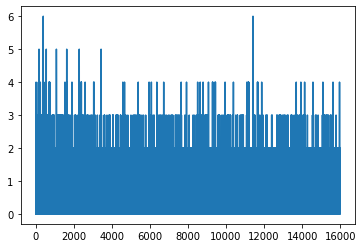

Episodes: 17000 Reward: -12 Epsilon: 0.0000 Positive Reward Count: 2:  34%|███▍      | 17001/50000 [4:42:22<9:56:50,  1.09s/it]


Epoch 17000


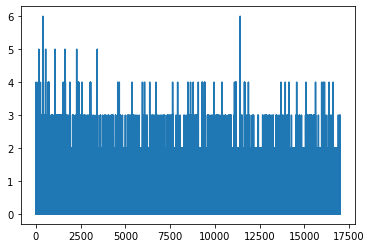

Episodes: 18000 Reward: -12 Epsilon: 0.0000 Positive Reward Count: 1:  36%|███▌      | 18001/50000 [4:59:13<8:40:07,  1.03it/s]


Epoch 18000


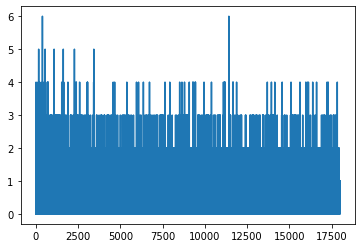

Episodes: 19000 Reward: -12 Epsilon: 0.0000 Positive Reward Count: 0:  38%|███▊      | 19001/50000 [5:16:02<9:17:34,  1.08s/it]


Epoch 19000


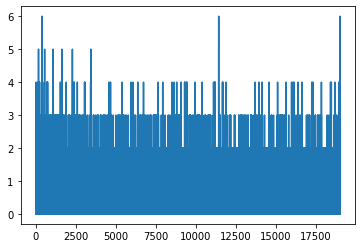

Episodes: 20000 Reward: -12 Epsilon: 0.0000 Positive Reward Count: 0:  40%|████      | 20001/50000 [5:33:03<8:03:58,  1.03it/s]


Epoch 20000


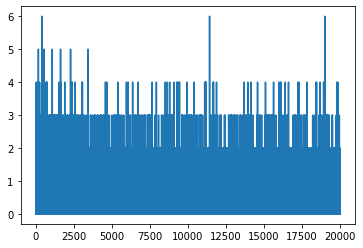

Episodes: 21000 Reward: -12 Epsilon: 0.0000 Positive Reward Count: 0:  42%|████▏     | 21001/50000 [5:50:23<8:22:54,  1.04s/it]


Epoch 21000


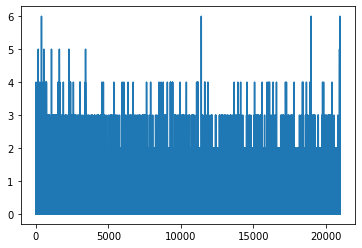

Episodes: 22000 Reward: -12 Epsilon: 0.0000 Positive Reward Count: 1:  44%|████▍     | 22001/50000 [6:08:39<8:24:18,  1.08s/it]


Epoch 22000


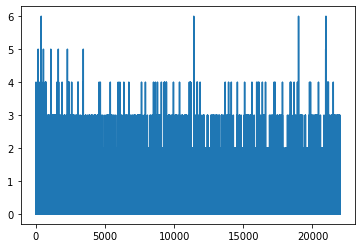

Episodes: 23000 Reward: -12 Epsilon: 0.0000 Positive Reward Count: 1:  46%|████▌     | 23001/50000 [6:27:03<8:24:19,  1.12s/it]


Epoch 23000


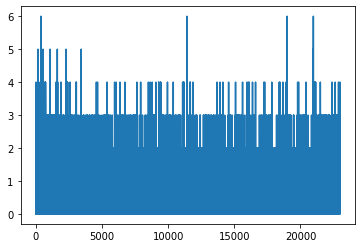

Episodes: 24000 Reward: -12 Epsilon: 0.0000 Positive Reward Count: 1:  48%|████▊     | 24001/50000 [6:45:24<8:35:49,  1.19s/it]


Epoch 24000


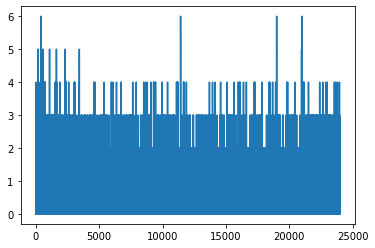

Episodes: 25000 Reward: -12 Epsilon: 0.0000 Positive Reward Count: 0:  50%|█████     | 25001/50000 [7:03:43<7:28:13,  1.08s/it]


Epoch 25000


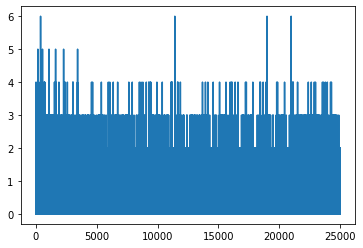

Episodes: 26000 Reward: -12 Epsilon: 0.0000 Positive Reward Count: 0:  52%|█████▏    | 26001/50000 [7:21:50<7:06:37,  1.07s/it]


Epoch 26000


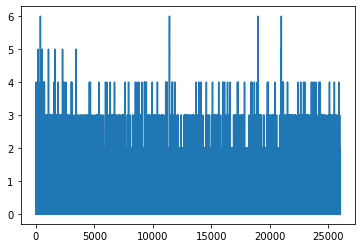

Episodes: 27000 Reward: -12 Epsilon: 0.0000 Positive Reward Count: 1:  54%|█████▍    | 27001/50000 [7:39:48<6:43:22,  1.05s/it]


Epoch 27000


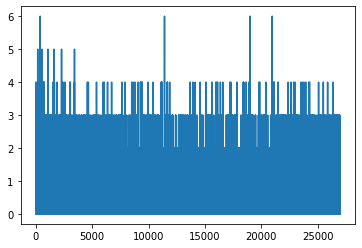

Episodes: 28000 Reward: -12 Epsilon: 0.0000 Positive Reward Count: 0:  56%|█████▌    | 28001/50000 [7:57:48<6:40:02,  1.09s/it]


Epoch 28000


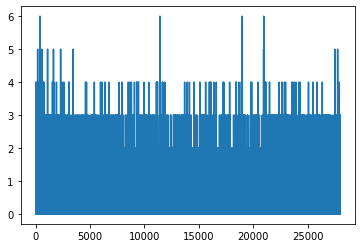

Episodes: 29000 Reward: -12 Epsilon: 0.0000 Positive Reward Count: 1:  58%|█████▊    | 29001/50000 [8:15:33<6:20:54,  1.09s/it]


Epoch 29000


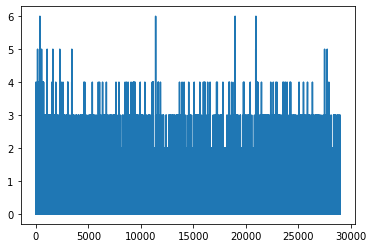

Episodes: 30000 Reward: -12 Epsilon: 0.0000 Positive Reward Count: 1:  60%|██████    | 30001/50000 [8:33:31<6:00:52,  1.08s/it]


Epoch 30000


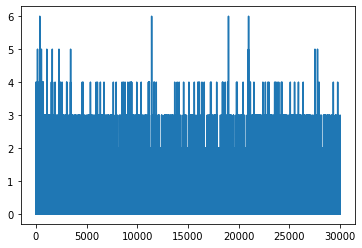

Episodes: 31000 Reward: -12 Epsilon: 0.0000 Positive Reward Count: 1:  62%|██████▏   | 31001/50000 [8:51:05<5:46:31,  1.09s/it]


Epoch 31000


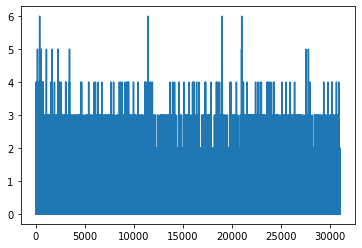

Episodes: 32000 Reward: -12 Epsilon: 0.0000 Positive Reward Count: 1:  64%|██████▍   | 32001/50000 [9:08:26<5:04:42,  1.02s/it]


Epoch 32000


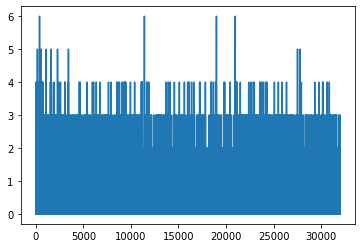

Episodes: 33000 Reward: -12 Epsilon: 0.0000 Positive Reward Count: 0:  66%|██████▌   | 33001/50000 [9:25:35<4:50:12,  1.02s/it]


Epoch 33000


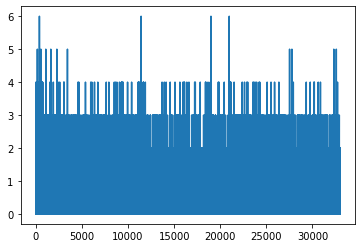

Episodes: 33350 Reward: -12 Epsilon: 0.0000 Positive Reward Count: 0:  67%|██████▋   | 33352/50000 [9:31:32<4:37:47,  1.00s/it]

Buffered data was truncated after reaching the output size limit.

In [0]:
def dqn_main(num_epochs=50000):
    # Hyper parameters
    model_dir = "/content/gdrive/My\ Drive/data/"
    lr = 1e-3
    start_training = 1000
    gamma = 0.99
    batch_size = 32
    epsilon = 1
    epsilon_decay = .99995
    target_update = 1000
    learn_frequency = 4

    # I wonder if helping the network learn on positive examples more would be better...
    # Throw some negative examples out. :)
    keep_neg_prop = 0.4

    # Init environment
    action_size = 9*81
    
    print("Loading grid.")
    env = SisypheanGrid('/content/sudoku.csv', max_len=1000000)
    print("Loaded grid.")

    # Init networks
    q_network = QNetwork(18, action_size).cuda()
    target_network = QNetwork(18, action_size).cuda()
    target_network.load_state_dict(q_network.state_dict())

    # Init optimizer
    optim = torch.optim.Adam(q_network.parameters(), lr=lr)

    # Init replay buffer
    memory = []

    total_learnings = 0

    # Begin main loop
    save_freq = 500
    results_dqn = []
    pos_reward_counts = []

    losses = []
    reward_curves = {}
    global_step = 0
    loop = tqdm(total=num_epochs, position=0, leave=False)
    for epoch in range(num_epochs):
        # New puzzle
        state, goal = env.reset()
        done = False
        cum_reward = 0  # Track cumulative reward per episode
        rewards = []
        pos_count = 0

        # Begin episode
        while not done and abs(cum_reward) < 12:
            # Select e-greedy action
            action, epsilon = get_action_dqn(q_network, state, epsilon, epsilon_decay)

            # Take step
            next_state, reward, done = env.act(state, action, goal)
            # env.render()

            # Store step in replay buffer
            memory.append((state, action, next_state, reward, done))

            if reward >= 0:
              pos_count += 1
              memory.append((state, action, next_state, reward, done))
            else:
              if random.random() < keep_neg_prop:
                memory.append((state, action, next_state, reward, done))
            
            cum_reward += reward
            rewards.append(reward)
            global_step += 1  # Increment total steps
            state = next_state  # Set current state

            # If time to train
            if global_step > start_training and global_step % learn_frequency == 0:
                total_learnings += 1

                # Sample batch
                batch = prepare_batch(memory, batch_size)

                # Train
                loss = learn_dqn(batch, optim, q_network, target_network, gamma, global_step, target_update)
                losses.append((global_step, loss))

        # Print results at end of episode
        results_dqn.append(cum_reward)
        pos_reward_counts.append(pos_count)
        reward_curves[epoch] = rewards
        loop.update(1)
        loop.set_description('Episodes: {} Reward: {} Epsilon: {:.4f} Positive Reward Count: {}'.format(epoch, cum_reward, epsilon, pos_count))
        
        if epoch % 1000 == 0:
          print(f"\nEpoch {epoch}")
          plt.plot(pos_reward_counts)
          plt.show()

        if epoch+1 % save_freq == 0:
            torch.save(q_network.state_dict(), model_dir + f'rl_kenneth.mod')
            json.dump({'rewards': reward_curves, 'loss': losses, 'pos_rewards': pos_reward_counts},
                      open(model_dir + f'rl-kenneth_results-{epoch}.json', 'w'))

    print(total_learnings)
    return results_dqn, pos_reward_counts

results_dqn = dqn_main()

In [0]:
plt.plot(results_dqn)
plt.show()